<a href="https://colab.research.google.com/github/GeraldKaeferle/deeplearning2020/blob/master/training_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# ohne Ausrufezeichen bei Ausführung im lokalen Notebook
!pip install --upgrade deeplearning2020

Requirement already up-to-date: deeplearning2020 in /usr/local/lib/python3.6/dist-packages (0.4.16)


In [0]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.layers import Dense, Activation, Input, \
  Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

from deeplearning2020.datasets import ImageWoof
from deeplearning2020 import helpers
# jupyters notebook Befehl zum direkten Anzeigen von Matplotlib Diagrammen
%matplotlib inline

In [0]:
train_data, test_data, classes = ImageWoof.load_data()

/root/.keras/datasets/imagewoof2-320/train
Loaded 9025 images
/root/.keras/datasets/imagewoof2-320/val
Loaded 3929 images


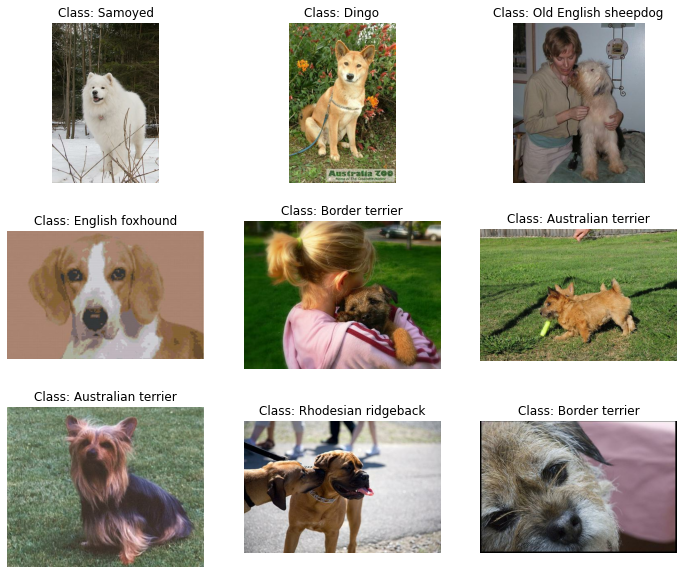

In [0]:
helpers.plot_images(train_data.take(9), classes)

In [0]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [300, 300])
    return resized_image, label

In [0]:
# Festlegung der Batch Größe für die Datenvorbereitung
batch_size = 32 

# Durchmischen der Trainingsdaten, dass nicht mit sortierten Bildern trainiert wird 

train_data = train_data.shuffle(1000) 

print('shape des Trainigsdatensatzes vor dem preprocessing: ', train_data)

train_data = train_data.map(preprocess) \
  .batch(batch_size).prefetch(1)          
test_data = test_data.map(preprocess) \
  .batch(batch_size).prefetch(1)

print('shape des Traingingsdatensatzes nach dem preprocessing: ', train_data)
n_classes=len(classes)

shape des Trainigsdatensatzes vor dem preprocessing:  <ShuffleDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int64)>
shape des Traingingsdatensatzes nach dem preprocessing:  <PrefetchDataset shapes: ((None, 300, 300, 3), (None,)), types: (tf.float32, tf.int64)>


In [0]:
classes

array(['Shih-Tzu', 'Rhodesian ridgeback', 'Beagle', 'English foxhound',
       'Border terrier', 'Australian terrier', 'Golden retriever',
       'Old English sheepdog', 'Samoyed', 'Dingo'], dtype='<U20')

In [0]:
# Parameter des Modells
learning_rate=0.0001
momentum=0.9
dense_neurons=576
n_filters=32
first_kernel_size=(7,7)

activation='relu'

# Inputgröße muss 300x300 Pixel mit 3 RGB Farben betragen
input_layer = Input(shape=(300, 300, 3))

# Convolutional Neural Network
# 6 Convolutional Layers mit jeweils einer Max Pooling Layer
model = Conv2D(
    filters=n_filters,
    kernel_size=(7,7),
    activation=activation
)(input_layer)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 32, 
    kernel_size=(3,3), 
    activation=activation
  )(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 64, 
    kernel_size=(3,3), 
    activation=activation
  )(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 64, 
    kernel_size=(3,3), 
    activation=activation
  )(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 64, 
    kernel_size=(3,3), 
    activation=activation
  )(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(filters = 64, 
  kernel_size=(3,3), 
  activation=activation, 
  padding='same'
)(model)
model = MaxPooling2D((2,2))(model)
model = Dropout(0.25)(model)

# Fully-Connected-Classifier
model = Flatten()(model)
model = Dense(
    dense_neurons,
    activation=activation
)(model)
model = Dropout(0.5)(model)
model = Dense(
    dense_neurons / 2,
    activation='tanh'
)(model)
model = Dropout(0.8)(model)
# Output Layer
output = Dense(
    n_classes,
   activation="softmax"
)(model)

CNN_model = Model(input_layer, output)

# Kompilieren des Modells
optimizer = tf.keras.optimizers.SGD(
    lr=learning_rate,
    momentum=momentum
)
#optimizer = tf.keras.optimizers.Adam(learning_rate)
CNN_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

In [0]:
CNN_model.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 294, 294, 32)      4736      
_________________________________________________________________
max_pooling2d_138 (MaxPoolin (None, 147, 147, 32)      0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 145, 145, 32)      9248      
_________________________________________________________________
max_pooling2d_139 (MaxPoolin (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 70, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_140 (MaxPoolin (None, 35, 35, 64)        0  

In [0]:
# Training des Modells
history = CNN_model.fit(
    train_data,
    epochs=32,
    validation_data=test_data
)

Epoch 1/32
283/283 [==============================] - 58s 205ms/step - loss: 2.3076 - accuracy: 0.1028 - val_loss: 2.3002 - val_accuracy: 0.1066
Epoch 2/32
283/283 [==============================] - 57s 203ms/step - loss: 2.3014 - accuracy: 0.1070 - val_loss: 2.2984 - val_accuracy: 0.1245
Epoch 3/32
283/283 [==============================] - 57s 203ms/step - loss: 2.2996 - accuracy: 0.1093 - val_loss: 2.2969 - val_accuracy: 0.1298
Epoch 4/32
283/283 [==============================] - 57s 203ms/step - loss: 2.2980 - accuracy: 0.1083 - val_loss: 2.2957 - val_accuracy: 0.1433
Epoch 5/32
283/283 [==============================] - 57s 202ms/step - loss: 2.2976 - accuracy: 0.1079 - val_loss: 2.2947 - val_accuracy: 0.1273
Epoch 6/32
283/283 [==============================] - 58s 204ms/step - loss: 2.2969 - accuracy: 0.1079 - val_loss: 2.2936 - val_accuracy: 0.1199
Epoch 7/32
283/283 [==============================] - 57s 202ms/step - loss: 2.2953 - accuracy: 0.1183 - val_loss: 2.2927 - val_ac

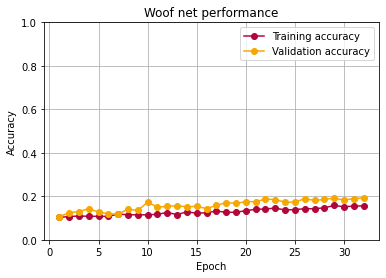

In [0]:
helpers.plot_history('Woof net performance', history, 0)